In [1]:
#导入相关依赖类
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#一、导入训练数据集与测试数据集
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#二、数据初步处理：观察数据行及列数
train.shape

(891, 12)

In [4]:
#观察数据列名 其中数据类型列：年龄（Age）、船舱号（Cabin）、船票价格（Fare）、登船港口（Embarked）
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#观察数据列类型
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#观察数据行列数据状态及数量类型等
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#查看数据行缺失情况 age、cabin、embarked分别缺失177、687和2行
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#按年龄中位数直接填充确实的年龄行数据
train['Age_test']=train['Age'].fillna(train['Age'].median())
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age_test,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000


In [9]:
#观察分类型数据：Embarked情况
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# 考虑到Embarked只缺失两行，采取直接删除该两行数据
train=train.drop(train[train.Embarked.isnull()].index)

In [11]:
#删除无用的列，Ticket,Cabin,Name对生还无影响，直接删除。确实数据列Age删除，待采用新列Age_test替换
train.drop(['Ticket','Cabin','Name','Age'],axis=1,inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_test
0,1,0,3,male,1,0,7.2500,S,22.0
1,2,1,1,female,1,0,71.2833,C,38.0


In [12]:
#重命名补充后的age列
train.rename(columns={'Age_test':'Age'},inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,male,1,0,7.2500,S,22.0
1,2,1,1,female,1,0,71.2833,C,38.0
2,3,1,3,female,0,0,7.9250,S,26.0
3,4,1,1,female,1,0,53.1000,S,35.0
4,5,0,3,male,0,0,8.0500,S,35.0


Text(0.5, 1.0, 'Survival')

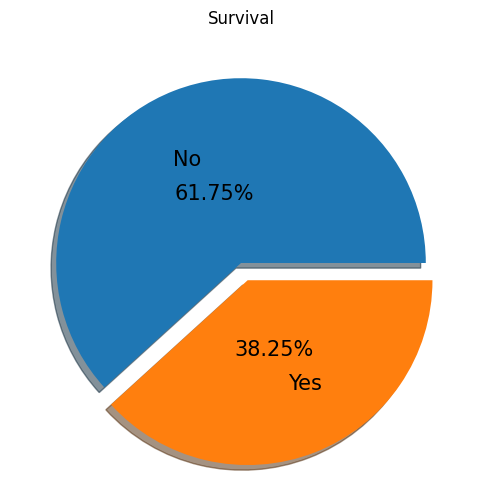

In [13]:
#三、数据相关性分析：
#整体生还率
plt.figure(figsize=(6,6))
plt.pie(train['Survived'].value_counts(),autopct='%.2f%%',labels=['No','Yes'],
        pctdistance=0.4,labeldistance=0.6,shadow=True,explode=[0,0.1],textprops=dict(size=15))
plt.title('Survival')

In [14]:
#与生存率相关的各数据特征，查看其基本分布情况：乘客等级、性别、年龄、票价和登船港口
 # 绘图
fig = plt.figure(figsize=(20,18))

<Figure size 2000x1800 with 0 Axes>

Text(0.5, 1.0, 'Pclass status')

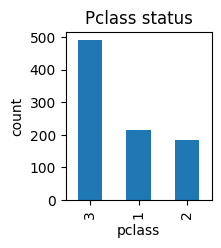

In [15]:
# 乘客等级分布
plt.subplot2grid((2, 3), (0, 0))
train['Pclass'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('pclass')
plt.title('Pclass status')
# 乘客等级：三等乘客人数最多，1等和2等的乘客相对较少

Text(0.5, 1.0, 'Age status')

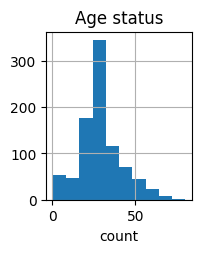

In [16]:
# 乘客的年龄分布
plt.subplot2grid((2, 3), (0, 2))
train['Age'].hist()
plt.xlabel('count')
plt.title('Age status')
#年龄：20-30岁区间的获救乘客最多

Text(0.5, 1.0, 'Fare status')

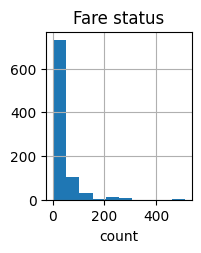

In [17]:
# 票价的分布
plt.subplot2grid((2, 3), (1, 0))
train['Fare'].hist()
plt.xlabel('count')
plt.title('Fare status')

Text(0.5, 1.0, 'Fare')

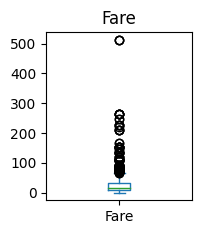

In [18]:
# 箱线图：票价的异常情况探查
plt.subplot2grid((2, 3), (1, 1))
train['Fare'].plot(kind='box')
plt.title('Fare')
#票价：由分布图和箱线图可知，票价存在异常值，需进一步查看数据异常是否合理

In [19]:
# 进一步查看票价的数据是否存在异常
print(train[train['Fare'] == min(train['Fare'])]['Fare'].value_counts())
print(train[train['Fare'] == max(train['Fare'])]['Fare'].value_counts())
# 极小值为0的有15个，而极大值为512的有3个

0.0    15
Name: Fare, dtype: int64
512.3292    3
Name: Fare, dtype: int64


Text(0.5, 1.0, 'sex status')

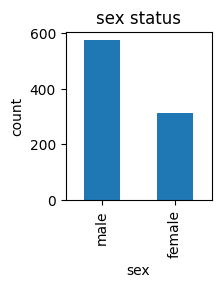

In [20]:
# 乘客性别分布
plt.subplot2grid((2, 3), (0, 1))
train['Sex'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('sex')
plt.title('sex status')
# 性别：男性多于女性

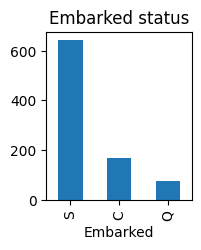

In [21]:
# 登船港口的分布情况
plt.subplot2grid((2, 3), (1, 2))
train['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.title('Embarked status')
plt.show()
# 港口：人数最多的目的地为S港，其次是C和Q
fig.savefig('plt')

In [22]:
#生存率与各项特征的关系
plt.figure(figsize=(20, 18), dpi=100)

<Figure size 2000x1800 with 0 Axes>

<Figure size 2000x1800 with 0 Axes>

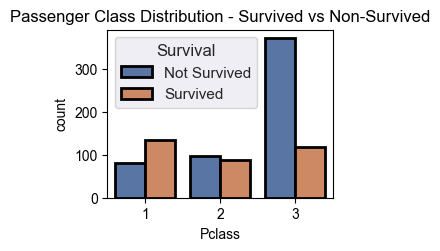

In [23]:
# 头等舱的客人存活率是63% 二等舱的客人存活率是48% 三等舱的客人存活率是24%
p2=plt.subplot(222)
sns.set(style='darkgrid')
ax=sns.countplot(x='Pclass',hue='Survived',data=train,edgecolor=(0,0,0),linewidth=2)
plt.title('Passenger Class Distribution - Survived vs Non-Survived',fontsize=12)

leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('Not Survived')
legs[1].set_text('Survived')

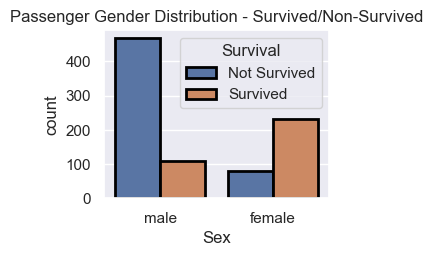

In [24]:
p1=plt.subplot(221)
sns.set(style='darkgrid')
ax=sns.countplot(x='Sex',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
plt.title('Passenger Gender Distribution - Survived/Non-Survived',fontsize=12)
        
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('Not Survived')
legs[1].set_text('Survived')
#女性存活率明显高于男性
plt.savefig('countplox')

In [25]:
#四、特征工程
#数据分区间处理，首先按船票价格区间观察
train['Fare']=train['Fare'].astype(int)
train.Fare.describe()

count    889.000000
mean      31.677165
std       49.706915
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [26]:
# 给船票价格特征提取，按照0-25、25-50、50-75，75-100分位分为4个特征区间
train.loc[train.Fare<=7,'Fare']=0
train.loc[(train.Fare>7)&(train.Fare<=14),'Fare']=1
train.loc[(train.Fare>14)&(train.Fare<=31),'Fare']=2
train.loc[train.Fare>31,'Fare']=3

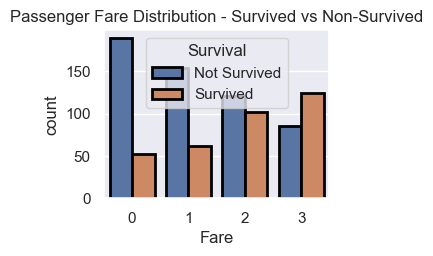

In [27]:
# 票价和获救情况的关系
p4 = plt.subplot(224)
sns.set(style='darkgrid')
ax=sns.countplot(x='Fare',hue='Survived',data=train,edgecolor=(0,0,0),linewidth=2)
plt.title('Passenger Fare Distribution - Survived vs Non-Survived',fontsize=12)

leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('Not Survived')
legs[1].set_text('Survived')

#票价越贵 存活率越高

In [28]:
#数据分区间处理，按年龄分区间观察
train.Age.describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
#同样按照年龄分特征区间，这里采用幼、少、青、壮、中、老几个社会年龄段划分
train['Age']=train['Age'].astype(int)
train.loc[ train['Age'] <= 7, 'Age']= 0
train.loc[(train['Age'] > 7) & (train['Age']  <= 12), 'Age'] = 1
train.loc[(train['Age'] > 12) & (train['Age'] <= 18), 'Age'] = 2
train.loc[(train['Age'] > 18) & (train['Age'] <= 45), 'Age'] = 3
train.loc[(train['Age'] > 45) & (train['Age'] <= 69), 'Age'] = 4
train.loc[train['Age'] > 69, 'Age'] = 5
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,1,0,3,male,1,0,0,S,3
1,2,1,1,female,1,0,3,C,3
2,3,1,3,female,0,0,0,S,3
3,4,1,1,female,1,0,3,S,3
4,5,0,3,male,0,0,1,S,3


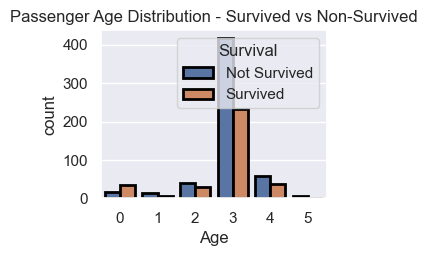

In [30]:
# 年龄特征提取，：
#0（初生）-6岁为婴幼儿；1.0:7-12岁为少儿；2.0:13-17岁为青少年；3.0:18-45岁为青年；4.0:46-69岁为中年；5.0:>69岁为老年
p3 = plt.subplot(223)
sns.set(style='darkgrid')
ax=sns.countplot(x='Age',hue='Survived',data=train,edgecolor=(0,0,0),linewidth=2)
plt.title('Passenger Age Distribution - Survived vs Non-Survived',fontsize=12)

leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('Not Survived')
legs[1].set_text('Survived')
# 0存活率最高， 其次是2和4、 3和5存活率最低

In [31]:
#乘客性别特征提取（Sex）：男性 male，女性female
sexMap = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(sexMap)
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [32]:
#港口特征提取 分为 Embarked_C	Embarked_Q	Embarked_S
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies( train['Embarked'] , prefix='Embarked' )
embarkedDf.head()
#添加one-hot编码产生的变量回train数据集
train = pd.concat([train,embarkedDf],axis=1)
#删掉客舱等级（Pclass）这一列
train.drop('Embarked',axis=1,inplace=True)

In [33]:
#客舱等级特征提取
pclassDf = pd.DataFrame()
#使用get_dummies进行one-hot编码，列名前缀是Pclass
pclassDf = pd.get_dummies( train['Pclass'] , prefix='Pclass' )
train = pd.concat([train,pclassDf],axis=1)
#删掉客舱等级（Pclass）这一列
train.drop('Pclass',axis=1,inplace=True)

Text(0.5, 1.0, 'Correlations Among Features')

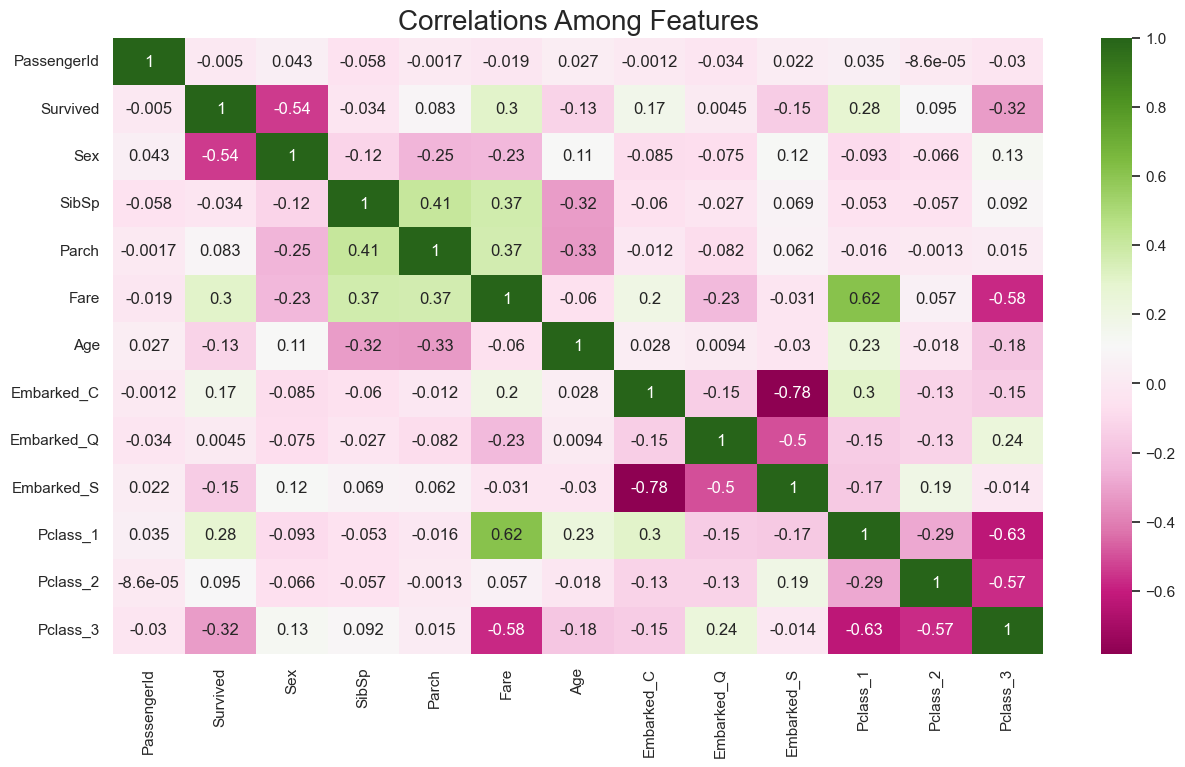

In [37]:
#相关性分析观察
plt.subplots(figsize=(15,8))
corrDf = train.corr()
sns.heatmap(corrDf,annot=True,cmap='PiYG')
plt.title('Correlations Among Features',fontsize=20)

In [35]:
#由生存率的相关系数可知，正相关系数最明显的是船票价格和生存率，达到0.3；负相关部分，性别和生存率之间是 -0.54，船舱等级和生存率之间是 -0.34。
#除生存率之外，相关系数绝对值较大的：船票价格和船舱等级 -0.66，其次是 兄弟姐妹/配偶数和父母/小孩数量 0.41。

In [39]:
#与存活率相关特征展示
corrDf['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.299045
Pclass_1       0.282368
Embarked_C     0.169966
Pclass_2       0.095002
Parch          0.083151
Embarked_Q     0.004536
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.126640
Embarked_S    -0.151777
Pclass_3      -0.320171
Sex           -0.541585
Name: Survived, dtype: float64

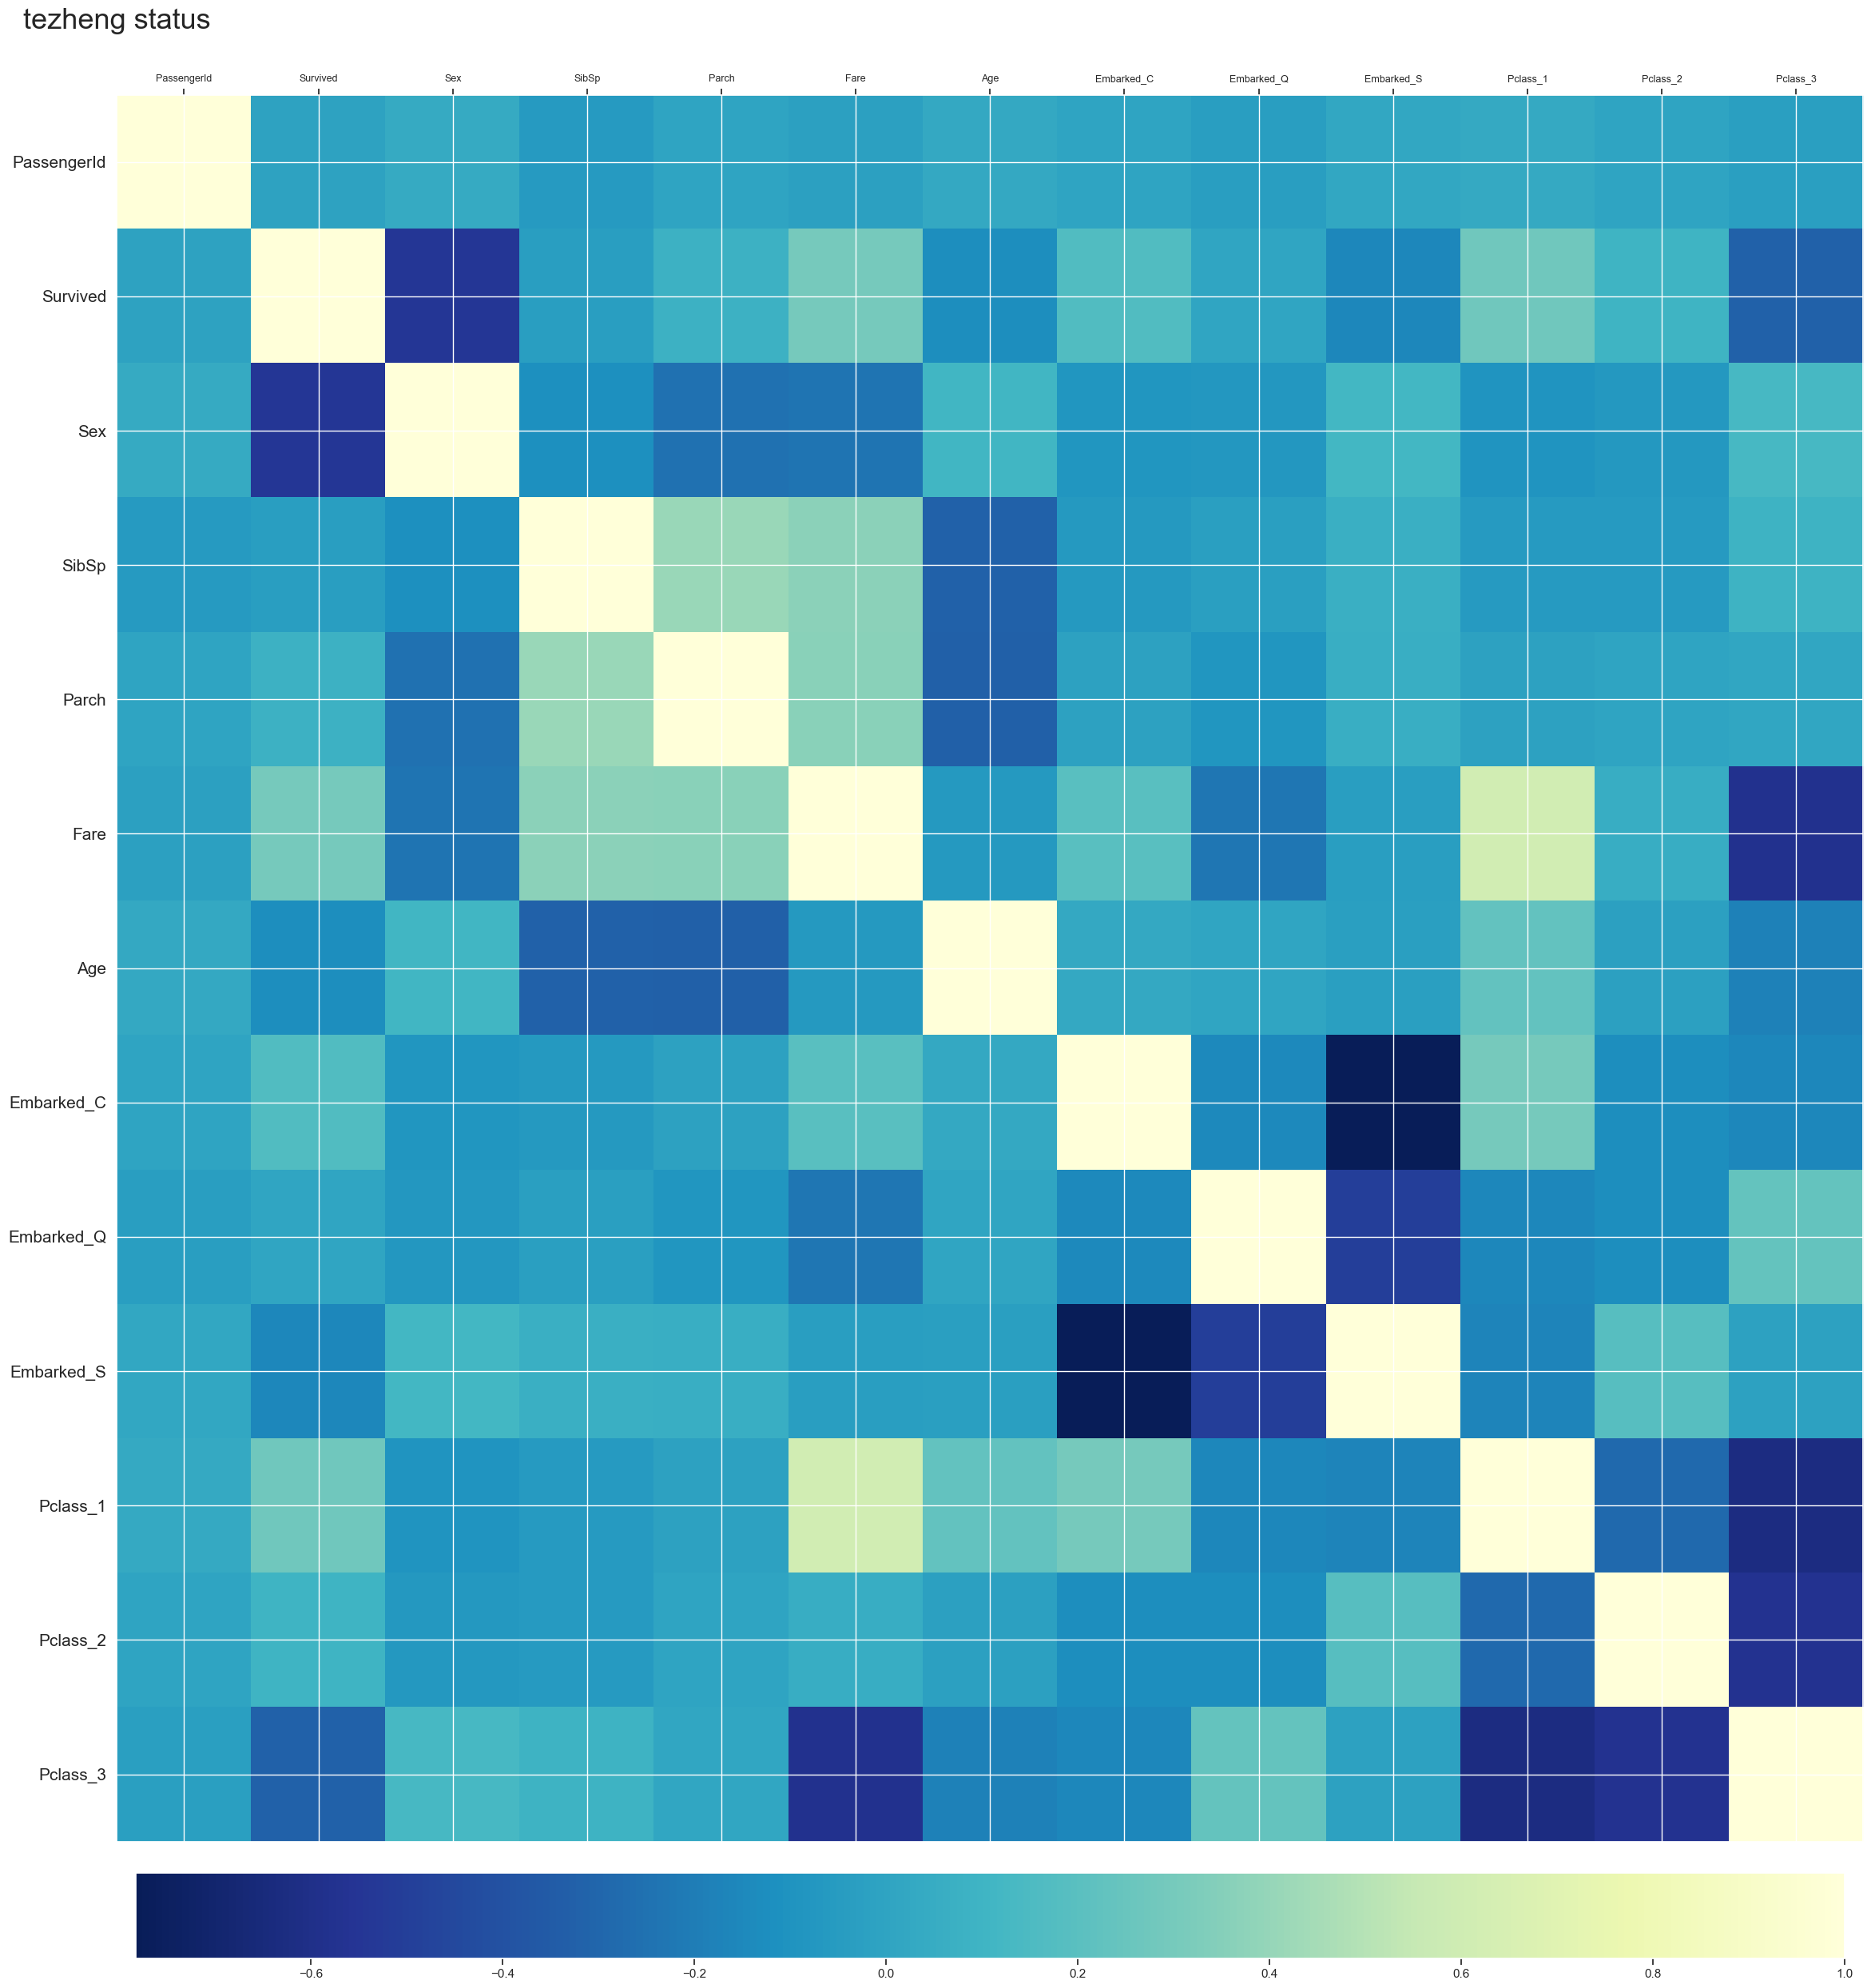

In [41]:
#特征选择
fig = plt.figure(figsize=(30,34))
ax = plt.subplot(1,1,1)

# corrDf  制热图的数据
data = corrDf.values
x = corrDf.index.values
y = corrDf.index.values

im = ax.imshow(data,cmap='YlGnBu_r') #用cmap设置配色方案
ax.set_yticks(np.arange(len(x)))     #设置x轴刻度
ax.set_xticks(np.arange(len(y)))     #设置y轴刻度
ax.xaxis.set_ticks_position('top')   #设置x轴刻度到上方
ax.set_xticklabels(x,fontsize='9')   #设置x轴刻度标签
ax.set_yticklabels(y,fontsize='15')  #设置y轴刻度标签
fig.colorbar(im,pad=0.015,shrink=0.92,orientation='horizontal')  #设置颜色条

ax.set_title('tezheng status',fontsize='26',x=0.0,y=1.034) 
#设置标题以及其位置和字体大小

plt.show()
fig.savefig('hot.jpg')

In [43]:
full_X = pd.concat([pclassDf,#客舱等级
                     train['Fare'],#船票价格
                     embarkedDf,#登船港口
                     train['Sex']],axis=1)
full_X.head()

,Pclass_1,Pclass_2,Pclass_3,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,1,1
1,1,0,0,3,1,0,0,0
2,0,0,1,0,0,0,1,0
3,1,0,0,3,0,0,1,0
4,0,0,1,1,0,0,1,1


In [ ]:
#根据各个特征与生成情况（Survived）的相关系数大小，选择以下这几个特征作为模型的输入：
#客舱等级（pclassDf）、船票价格（Fare）、登船港口（embarkedDf）、性别（Sex）
# https://zhuanlan.zhihu.com/p/368133579